In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
#first task
#functions for reading gff and bed6 files
def read_gff(path_to_gff_file):
    df_gff = pd.read_csv(path_to_gff_file,
                 sep='\t', 
                 header=0,
                 names=['chromosome', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    return df_gff

df_gff = read_gff('/home/sweetlana/BioInf2022/Python/homework/HW5_Visualisation/rrna_annotation.gff')

In [130]:
def read_bed6(path_to_bed_file):
    df_bed6 = pd.read_csv(path_to_bed_file, 
                      sep='\t',
                      names=['chromosome', 'start', 'end', 'name', 'score', 'strand'])
    return df_bed6

df_bed6 = read_bed6('/home/sweetlana/BioInf2022/Python/homework/HW5_Visualisation/alignment.bed')

In [131]:
#rename column 'attributes' to shorter one
df_gff['attributes'] = df_gff['attributes'].apply(lambda x: x.split('Name=')[1].split('_')[0])
df_gff

chromosome       source  type    start      end         score strand  \
0    Reference_10  barrnap:0.9  rRNA    67122    68652  0.000000e+00      +   
1    Reference_10  barrnap:0.9  rRNA    68981    72061  0.000000e+00      +   
2    Reference_10  barrnap:0.9  rRNA   469298   470826  0.000000e+00      +   
3    Reference_10  barrnap:0.9  rRNA   471166   474246  0.000000e+00      +   
4    Reference_10  barrnap:0.9  rRNA  3629599  3632680  0.000000e+00      -   
..            ...          ...   ...      ...      ...           ...    ...   
343  Reference_25  barrnap:0.9  rRNA  1819878  1822785  0.000000e+00      +   
344  Reference_25  barrnap:0.9  rRNA  1822913  1823016  2.900000e-10      +   
345  Reference_25  barrnap:0.9  rRNA  3744056  3744159  2.900000e-10      -   
346  Reference_25  barrnap:0.9  rRNA  3744287  3747194  0.000000e+00      -   
347  Reference_25  barrnap:0.9  rRNA  3747656  3749126  0.000000e+00      -   

    phase attributes  
0       .        16S  
1       .        23S  
2       .        16S  
3       .        23S  
4       .        23S  
..    ...        ...  
343     .        23S  
344     .         5S  
345     .         5S  
346     .        23S  
347     .        16S  

[348 rows x 9 columns]

<AxesSubplot:xlabel='chromosome'>

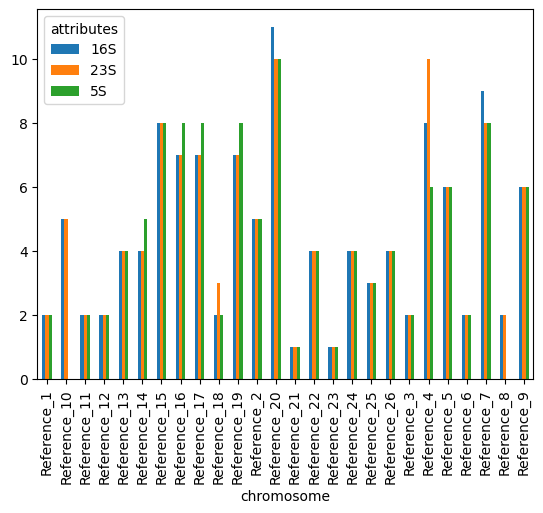

In [417]:
#make a table of attributes grouped by chromosome and create barplot
two_col = df_gff[['chromosome','attributes']]
table_gff = two_col.groupby('chromosome').value_counts().unstack()
table_gff.plot.bar()

In [196]:
#intersect two files and obtain information about contigs
intersect = pd.merge(df_gff,df_bed6, on="chromosome", how="outer")
intersect[(intersect['start_x'] >= intersect['start_y']) & (intersect['end_x'] <= intersect['end_y'])]

chromosome       source  type  start_x    end_x       score_x  \
129     Reference_11  barrnap:0.9  rRNA   924358   925855  0.000000e+00   
156     Reference_11  barrnap:0.9  rRNA   926697   929642  0.000000e+00   
183     Reference_11  barrnap:0.9  rRNA   929827   929936  1.400000e-12   
215     Reference_11  barrnap:0.9  rRNA  2074460  2075957  0.000000e+00   
242     Reference_11  barrnap:0.9  rRNA  2076799  2079744  0.000000e+00   
...              ...          ...   ...      ...      ...           ...   
121855  Reference_14  barrnap:0.9  rRNA  2433040  2433152  2.000000e-12   
122182  Reference_14  barrnap:0.9  rRNA  3766952  3767064  2.000000e-12   
122583  Reference_25  barrnap:0.9  rRNA  1329370  1329473  2.900000e-10   
125060  Reference_25  barrnap:0.9  rRNA  1822913  1823016  2.900000e-10   
125776  Reference_25  barrnap:0.9  rRNA  3744056  3744159  2.900000e-10   

       strand_x phase attributes  start_y    end_y  \
129           +     .        16S   923529   930070   
156           +     .        23S   923529   930070   
183           +     .         5S   923529   930070   
215           +     .        16S  2073631  2080172   
242           +     .        23S  2073631  2080172   
...         ...   ...        ...      ...      ...   
121855        -     .         5S  2433027  2433434   
122182        -     .         5S  3766939  3767346   
122583        -     .         5S  1329345  1329810   
125060        +     .         5S  1822575  1823040   
125776        -     .         5S  3744031  3744496   

                                        name  score_y strand_y  
129     NODE_1081_length_6540_cov_836.773323        0        -  
156     NODE_1081_length_6540_cov_836.773323        0        -  
183     NODE_1081_length_6540_cov_836.773323        0        -  
215     NODE_1081_length_6540_cov_836.773323        0        -  
242     NODE_1081_length_6540_cov_836.773323        0        -  
...                                      ...      ...      ...  
121855  NODE_6108_length_407_cov_1153.232955        0        +  
122182  NODE_6108_length_407_cov_1153.232955        0        +  
122583   NODE_5333_length_465_cov_547.609756        0        -  
125060   NODE_5333_length_465_cov_547.609756        0        +  
125776   NODE_5333_length_465_cov_547.609756        0        -  

[120 rows x 14 columns]

In [200]:
#second task
diff_data = pd.read_table('/home/sweetlana/BioInf2022/Python/homework/HW5_Visualisation/diffexpr_data.tsv.gz')

Text(5, 12, 'ZIC2')

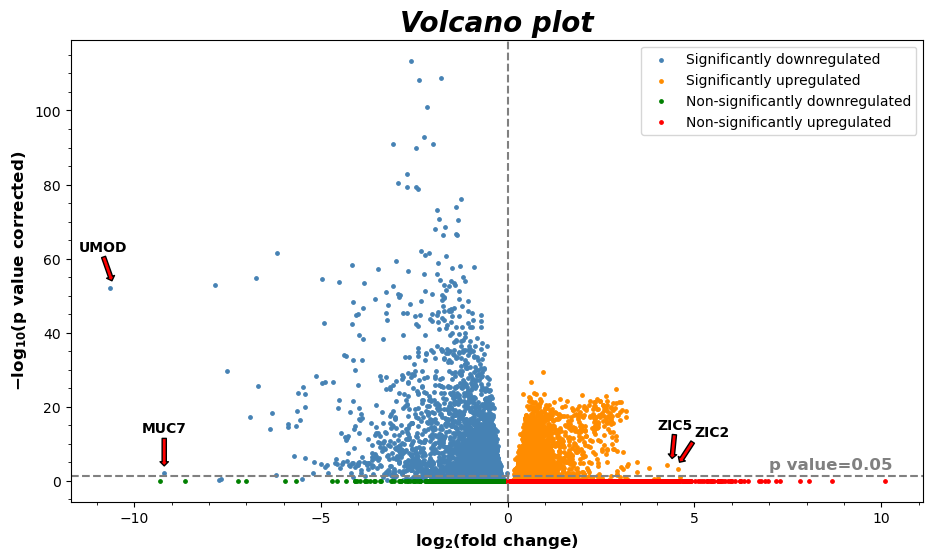

In [416]:
fig, ax = plt.subplots(figsize=(11,6))

#put 4 segments on graph
sign_down_blue = diff_data[(diff_data['logFC'] < 0) & (diff_data['log_pval'] > 0.05)]
plt.scatter(sign_down_blue['logFC'], sign_down_blue['log_pval'], s=6,
            color='steelblue', label='Significantly downregulated')

sign_up_orange = diff_data[(diff_data['logFC'] >= 0) & (diff_data['log_pval'] > 0.05)]
plt.scatter(sign_up_orange['logFC'], sign_up_orange['log_pval'], s=6,
            color='darkorange', label='Significantly upregulated')

nonsign_down_green = diff_data[(diff_data['logFC'] < 0) & (diff_data['log_pval'] <= 0.05)]
plt.scatter(nonsign_down_green['logFC'], nonsign_down_green['log_pval'], s=6,
            color='green', label='Non-significantly downregulated')

nonsign_up_red = diff_data[(diff_data['logFC'] >= 0) & (diff_data['log_pval'] <= 0.05)]
plt.scatter(nonsign_up_red['logFC'], nonsign_up_red['log_pval'], s=6,
            color='red', label='Non-significantly upregulated')

#set labels,title and legend  
ax.set_xlabel(r'$\bf{log_2(fold \ change)}$',fontsize=12)
#here italic and bold did not work together:(
ax.set_ylabel(r'$\bf{-log_{10}(p \ value \ corrected)}$', fontsize=12) 
ax.set_title('Volcano plot', size=20, style='oblique', fontweight='bold')
ax.legend()

#separate the segments with a dotted line
plt.axvline(x = 0, linestyle='--', color='gray', linewidth=1.5)
plt.axhline(y= -np.log10(0.05), linestyle='--', color='gray', linewidth=1.5)
plt.text(7, 3, 'p value=0.05', weight='bold',  color='gray', fontsize=12)

#add minor ticks on axes
ax.minorticks_on()

#annotate genes
plt.annotate('UMOD', xy=(-10.6, 54), xytext=(-11.5, 62),fontweight='bold',
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))
plt.annotate('MUC7', xy=(-9.2, 4), xytext=(-9.8, 13), fontweight='bold', 
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))
plt.annotate('ZIC5', xy=(4.4, 6), xytext=(4, 14), fontweight='bold',
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))
plt.annotate('ZIC2', xy=(4.6, 5), xytext=(5, 12), fontweight='bold',
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))

